In [1]:
import cv2 as cv
import time
import numpy as np
import os
import skimage
import matplotlib.pyplot as plt
import matplotlib
import math
import deeptrack as dt


d:\miniconda3\envs\ml\lib\site-packages\deeptrack\backend\_config.py:11: UserWarning: cupy not installed. GPU-accelerated simulations will not be possible
  warnings.warn(
d:\miniconda3\envs\ml\lib\site-packages\deeptrack\backend\_config.py:25: UserWarning: cupy not installed, CPU acceleration not enabled
  warnings.warn("cupy not installed, CPU acceleration not enabled")
d:\miniconda3\envs\ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
%matplotlib inline


In [4]:
def extract_frames(path, start_frame=0, stop_frame=0, invert=True, apply_func=None, step=1, *args, **kwargs):
    video = cv.VideoCapture(path)
    num_frames = int(video.get(cv.CAP_PROP_FRAME_COUNT))
    if stop_frame == 0:
        stop_frame = num_frames
    frames = [None] * num_frames
    for i in range(start_frame, stop_frame):
        _, frame = video.read()
        # frame = to_8bit(frame)
        if invert: frame = invert_color(frame)
        if i % step == 0 and callable(apply_func):
            apply_func(path, frame, i, *args, **kwargs)
        frames[i] = frame
    video.release()
    return frames

def play(frames, stop_key=" "):
    for frame in frames:
        cv.imshow('Example', frame)
        if cv.waitKey(20) & 0xFF==ord(stop_key):
            break
    cv.destroyAllWindows()
    
def invert_color(frame):
    return skimage.util.invert(frame)

In [5]:
def save_frame(path_to_video, frame, i, target_dir=""):
    video_name = path_to_video.split("/")[-1]
    img_name = video_name.split(".")[0] + str(i) + ".png"
    img_path = target_dir + "/" + img_name
    cv.imwrite(img_path, frame)

In [23]:
def videos_to_images(video_folder):
    for video in os.listdir(video_folder):
        if video.endswith(".avi"):
            img_folder = video_folder + video.split(".")[0]
            if not os.path.exists(img_folder):    
                os.mkdir(img_folder)
            path_to_video = video_folder + video
            print(path_to_video)
            extract_frames(path_to_video, 0, 0, True, save_frame, 1, target_dir=img_folder)


In [ ]:
# videos_to_images("./test_data/videos/")

In [27]:
def display(img):
    fig, ax = plt.subplots()
    fig.tight_layout()
    ax.imshow(img, cmap='gray')

In [2]:
def read(path):
    img = cv.imread(path)
    return img

In [5]:
def detect(img_path, debug=False, alpha=0.5, cutoff=0.99):
    model = dt.models.LodeSTAR(input_shape=(None, None, 3))
    model.load_weights("./model/weights")
    
    # image = dt.LoadImage(img_path)()._value / 256
    image = read(img_path) / 256

    detections = model.predict_and_detect(image[np.newaxis], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="quantile")[0]
    # detections = autotracker.detect(pred[0], weights[0], beta=1-alpha, alpha=alpha, cutoff=cutoff, mode="constant")

    if debug:
        plt.figure(figsize=(15, 15))
        plt.imshow(image)
        plt.axis("off")
        plt.scatter(detections[:, 1], detections[:, 0], color="r")

1/1 [==============================] - 1s 553ms/step


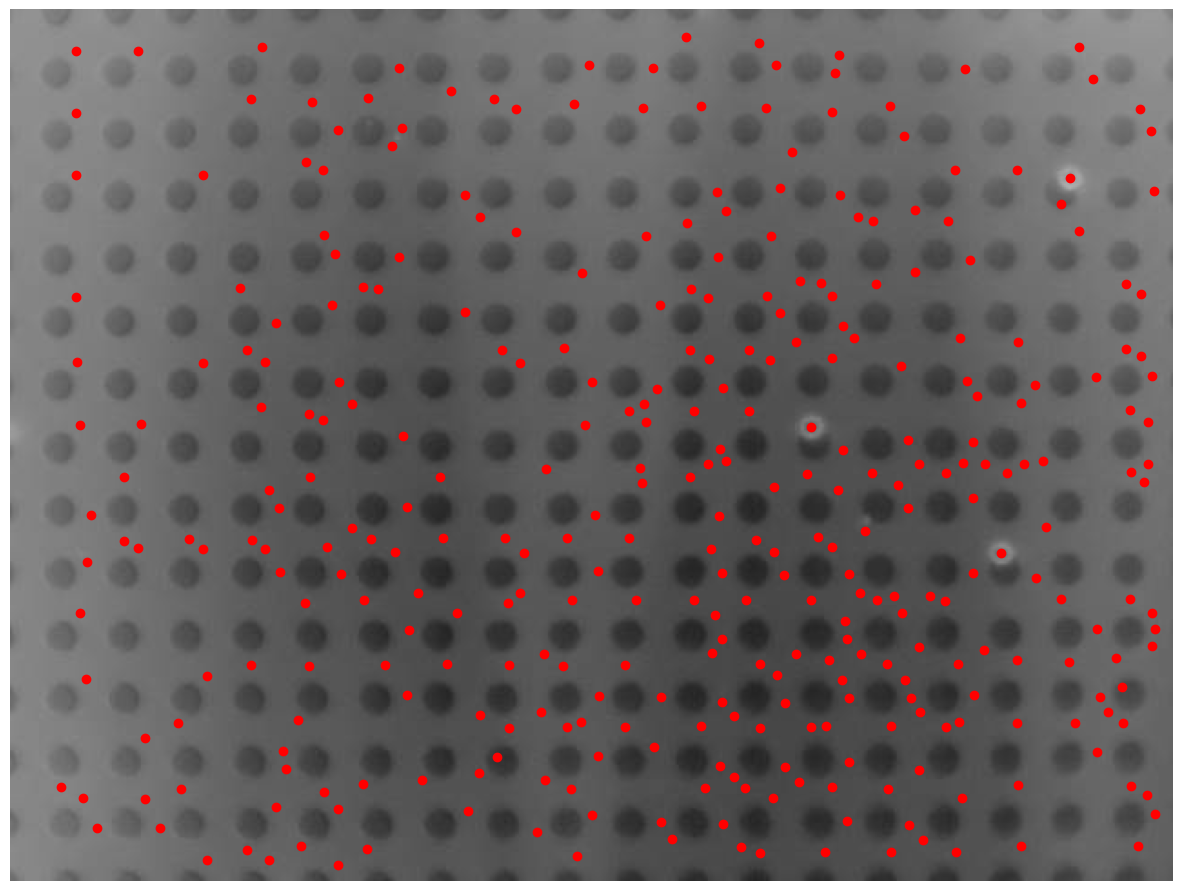

In [6]:
alpha = 0.1
cutoff = 0.9
detect("./test_data/videos/01hz left/01hz left0.png", True)